In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-smartphone-decimeter-challenge/sample_submission.csv
/kaggle/input/google-smartphone-decimeter-challenge/baseline_locations_train.csv
/kaggle/input/google-smartphone-decimeter-challenge/baseline_locations_test.csv
/kaggle/input/google-smartphone-decimeter-challenge/metadata/constellation_type_mapping.csv
/kaggle/input/google-smartphone-decimeter-challenge/metadata/accumulated_delta_range_state_bit_map.json
/kaggle/input/google-smartphone-decimeter-challenge/metadata/raw_state_bit_map.json
/kaggle/input/google-smartphone-decimeter-challenge/test/2021-04-29-US-MTV-2/SamsungS20Ultra/SamsungS20Ultra_GnssLog.txt
/kaggle/input/google-smartphone-decimeter-challenge/test/2021-04-29-US-MTV-2/SamsungS20Ultra/SamsungS20Ultra_derived.csv
/kaggle/input/google-smartphone-decimeter-challenge/test/2021-04-29-US-MTV-2/SamsungS20Ultra/supplemental/SamsungS20Ultra_GnssLog.21o
/kaggle/input/google-smartphone-decimeter-challenge/test/2021-04-29-US-MTV-2/Pixel5/Pixel5_derived.csv
/kaggl

In [2]:
import pandas as pd

In [3]:
df_test = pd.read_csv('../input/google-smartphone-decimeter-challenge/baseline_locations_test.csv')
df_train = pd.read_csv('../input/google-smartphone-decimeter-challenge/baseline_locations_train.csv')

In [4]:
df_train.head()

,collectionName,phoneName,millisSinceGpsEpoch,latDeg,lngDeg,heightAboveWgs84EllipsoidM,phone
0,2020-05-14-US-MTV-1,Pixel4,1273529463442,37.423575,-122.094091,-34.06,2020-05-14-US-MTV-1_Pixel4
1,2020-05-14-US-MTV-1,Pixel4,1273529464442,37.423578,-122.094101,-33.29,2020-05-14-US-MTV-1_Pixel4
2,2020-05-14-US-MTV-1,Pixel4,1273529465442,37.423573,-122.094111,-30.99,2020-05-14-US-MTV-1_Pixel4
3,2020-05-14-US-MTV-1,Pixel4,1273529466442,37.423583,-122.094121,-32.83,2020-05-14-US-MTV-1_Pixel4
4,2020-05-14-US-MTV-1,Pixel4,1273529467442,37.423579,-122.094114,-34.49,2020-05-14-US-MTV-1_Pixel4


In [5]:
df_test.head()

,collectionName,phoneName,millisSinceGpsEpoch,latDeg,lngDeg,heightAboveWgs84EllipsoidM,phone
0,2020-05-15-US-MTV-1,Pixel4,1273608785432,37.416628,-122.082053,-30.69,2020-05-15-US-MTV-1_Pixel4
1,2020-05-15-US-MTV-1,Pixel4,1273608786432,37.416646,-122.082040,-31.76,2020-05-15-US-MTV-1_Pixel4
2,2020-05-15-US-MTV-1,Pixel4,1273608787432,37.416652,-122.082039,-31.65,2020-05-15-US-MTV-1_Pixel4
3,2020-05-15-US-MTV-1,Pixel4,1273608788432,37.416607,-122.082063,-31.52,2020-05-15-US-MTV-1_Pixel4
4,2020-05-15-US-MTV-1,Pixel4,1273608789432,37.416609,-122.082073,-28.95,2020-05-15-US-MTV-1_Pixel4


In [6]:
df_train.describe()

,millisSinceGpsEpoch,latDeg,lngDeg,heightAboveWgs84EllipsoidM
count,1.313420e+05,131342.000000,131342.000000,131342.000000
mean,1.287913e+12,37.435206,-122.154925,23.832922
std,1.162110e+10,0.082712,0.145974,72.589312
min,1.273529e+12,37.321683,-122.472214,-6157.470000
25%,1.275424e+12,37.371575,-122.275109,-26.790000
50%,1.283279e+12,37.424360,-122.118311,3.230000
75%,1.302558e+12,37.469109,-122.069091,59.410000
max,1.303771e+12,37.690836,-121.881855,13701.980000


In [7]:
df_test.describe()

,millisSinceGpsEpoch,latDeg,lngDeg,heightAboveWgs84EllipsoidM
count,9.148600e+04,91486.000000,91486.000000,91486.000000
mean,1.289832e+12,37.453128,-122.154313,-2.037281
std,1.296896e+10,0.093020,0.146901,43.266477
min,1.273609e+12,37.328368,-122.433247,-224.350000
25%,1.275847e+12,37.386699,-122.270216,-28.130000
50%,1.299958e+12,37.424149,-122.109190,-15.580000
75%,1.301953e+12,37.495700,-122.079975,0.760000
max,1.303773e+12,37.778231,-121.881889,941.020000


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


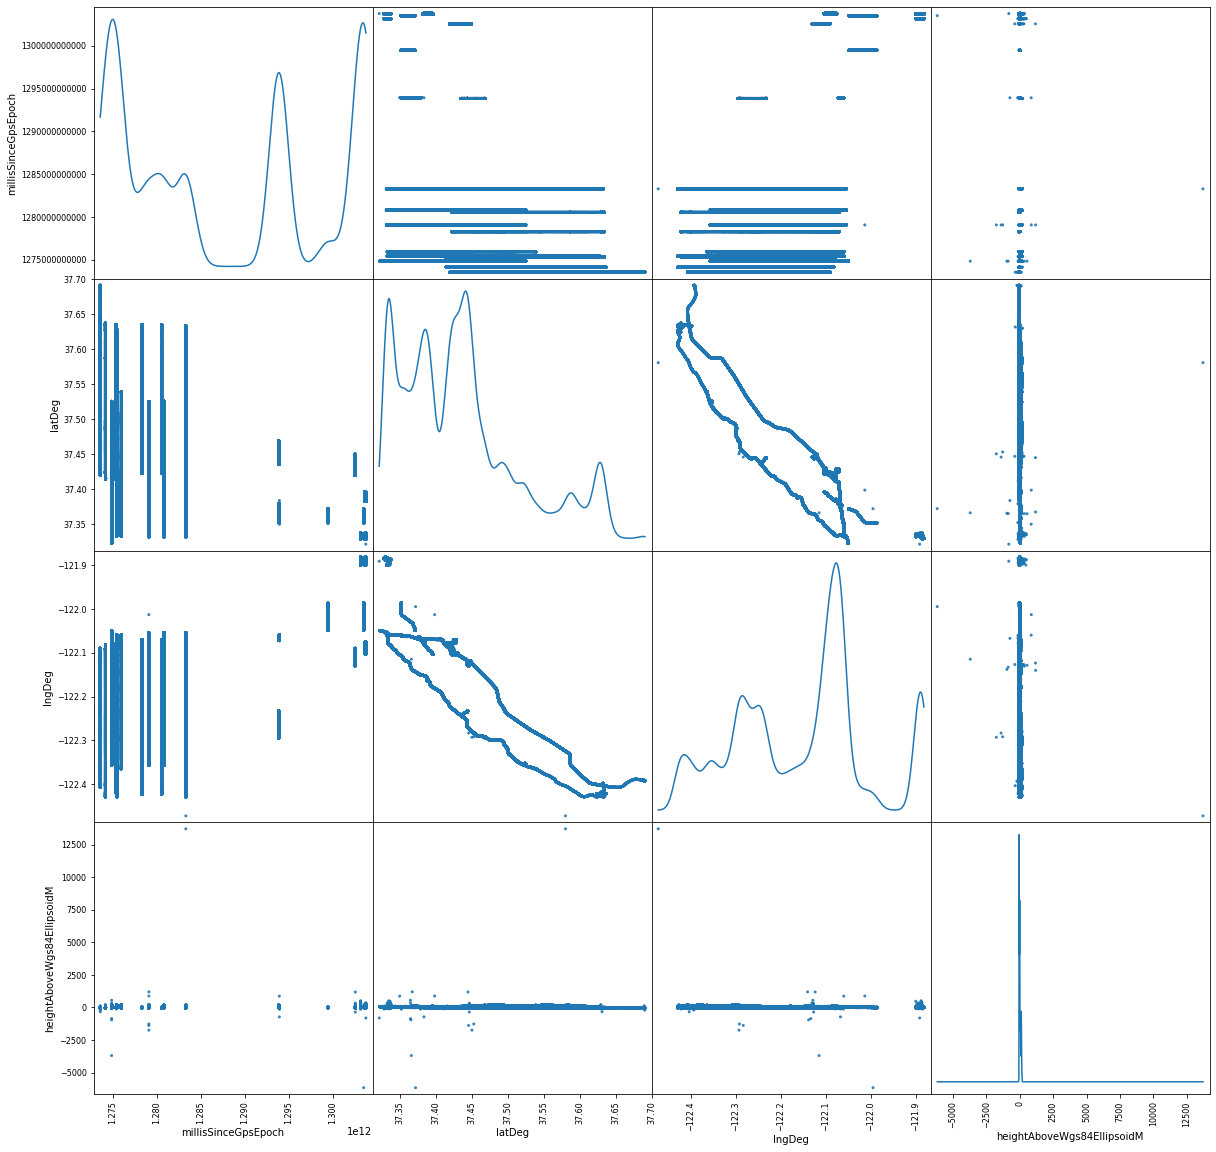

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_train, alpha=0.9, figsize=(20, 20), diagonal="kde");

In [9]:
df_train.info()
df_train.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131342 entries, 0 to 131341
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   collectionName              131342 non-null  object 
 1   phoneName                   131342 non-null  object 
 2   millisSinceGpsEpoch         131342 non-null  int64  
 3   latDeg                      131342 non-null  float64
 4   lngDeg                      131342 non-null  float64
 5   heightAboveWgs84EllipsoidM  131342 non-null  float64
 6   phone                       131342 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 7.0+ MB


collectionName                    29
phoneName                          7
millisSinceGpsEpoch           128295
latDeg                        120092
lngDeg                        122667
heightAboveWgs84EllipsoidM     20414
phone                             73
dtype: int64

In [10]:
df_train['name_unique'] = df_train['phoneName'].astype(str) + '-' + df_train['millisSinceGpsEpoch'].astype(str)
df_train.info()
df_train.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131342 entries, 0 to 131341
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   collectionName              131342 non-null  object 
 1   phoneName                   131342 non-null  object 
 2   millisSinceGpsEpoch         131342 non-null  int64  
 3   latDeg                      131342 non-null  float64
 4   lngDeg                      131342 non-null  float64
 5   heightAboveWgs84EllipsoidM  131342 non-null  float64
 6   phone                       131342 non-null  object 
 7   name_unique                 131342 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 8.0+ MB


collectionName                    29
phoneName                          7
millisSinceGpsEpoch           128295
latDeg                        120092
lngDeg                        122667
heightAboveWgs84EllipsoidM     20414
phone                             73
name_unique                   131342
dtype: int64

In [11]:
df_train.head()

,collectionName,phoneName,millisSinceGpsEpoch,latDeg,lngDeg,heightAboveWgs84EllipsoidM,phone,name_unique
0,2020-05-14-US-MTV-1,Pixel4,1273529463442,37.423575,-122.094091,-34.06,2020-05-14-US-MTV-1_Pixel4,Pixel4-1273529463442
1,2020-05-14-US-MTV-1,Pixel4,1273529464442,37.423578,-122.094101,-33.29,2020-05-14-US-MTV-1_Pixel4,Pixel4-1273529464442
2,2020-05-14-US-MTV-1,Pixel4,1273529465442,37.423573,-122.094111,-30.99,2020-05-14-US-MTV-1_Pixel4,Pixel4-1273529465442
3,2020-05-14-US-MTV-1,Pixel4,1273529466442,37.423583,-122.094121,-32.83,2020-05-14-US-MTV-1_Pixel4,Pixel4-1273529466442
4,2020-05-14-US-MTV-1,Pixel4,1273529467442,37.423579,-122.094114,-34.49,2020-05-14-US-MTV-1_Pixel4,Pixel4-1273529467442


In [12]:
df_train['name_unique'].values

array(['Pixel4-1273529463442', 'Pixel4-1273529464442',
       'Pixel4-1273529465442', ..., 'SamsungS20Ultra-1303760317000',
       'SamsungS20Ultra-1303760318000', 'SamsungS20Ultra-1303760319000'],
      dtype=object)

In [ ]:
path = '../input/google-smartphone-decimeter-challenge/train/' # use your path
#all_dir = path + "2020*"
#all_dir = glob.glob(path + "2020*")
#print(all_dir)
li = []

for index, irow in df_train.iterrows():
    filename = path + irow['collectionName'] + '/' + irow['phoneName'] + '/' + irow['phoneName'] + '_derived.csv'
    
    df = pd.read_csv(filename, index_col=None, header=0)
    
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)